In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image


import os
import cv2


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/river-vs-lake/River vs Lake/river water/Image_22.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_53.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_69.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_68.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_51.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_88.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_4.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_75.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_12.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_16.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_72.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_58.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_62.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_2.jpg
/kaggle/input/river-vs-lake/River vs Lake/river water/Image_45.j

# **** Data Exploration ****


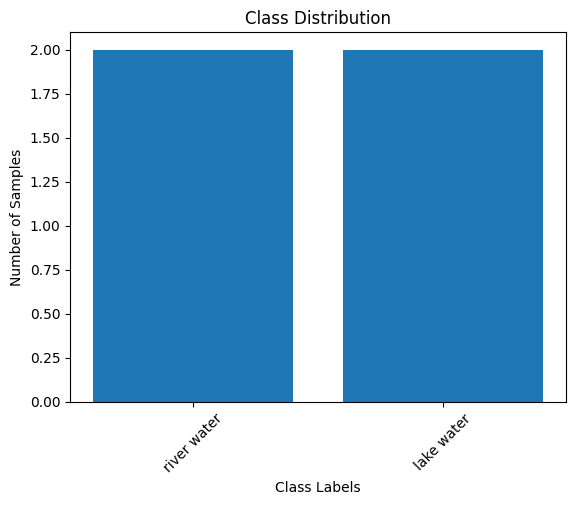

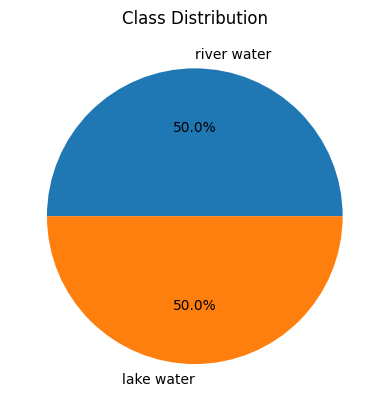

In [2]:
 #Define the path to your dataset
dataset_dir = '/kaggle/input/river-vs-lake/River vs Lake'

# Initialize lists to store data and labels
X = []
y = []

# Create a list to store class labels
class_labels = []

# Iterate through the subdirectories and load the images and labels
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        # Load images from the class folder
        image_paths = glob.glob(os.path.join(class_path, '*.jpeg'))  # Assuming your images have .jpeg extension
        X.extend(image_paths)
        class_labels.extend([class_folder] * len(image_paths))

# Check the class distribution
class_distribution = Counter(class_labels)

# Create a bar chart for class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

# Create a pie chart for class distribution
plt.pie(class_distribution.values(), labels=class_distribution.keys(), autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

Data set seems balanced


****Overview of the data set ****


Found 190 images belonging to 2 classes.
(20, 150, 150, 3)


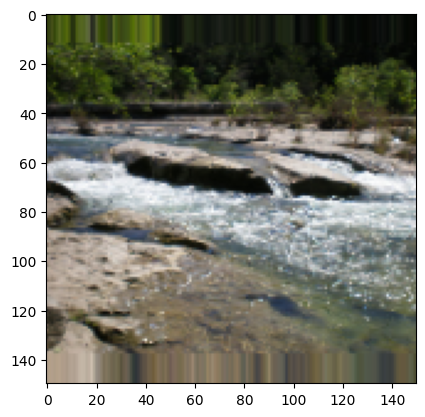

(20, 150, 150, 3)


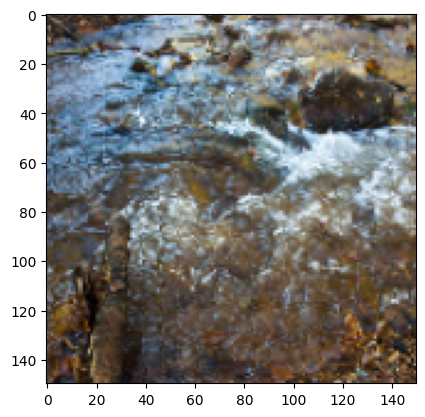

(20, 150, 150, 3)


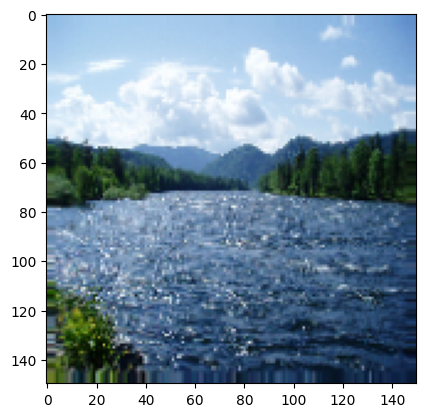

(20, 150, 150, 3)


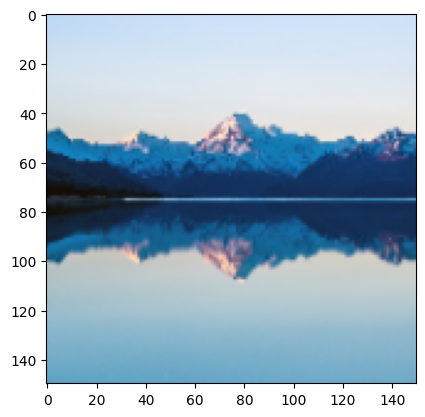

(20, 150, 150, 3)


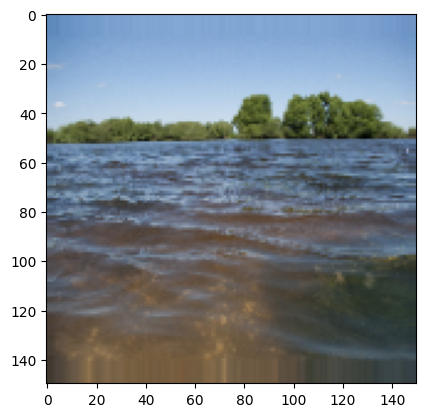

(20, 150, 150, 3)


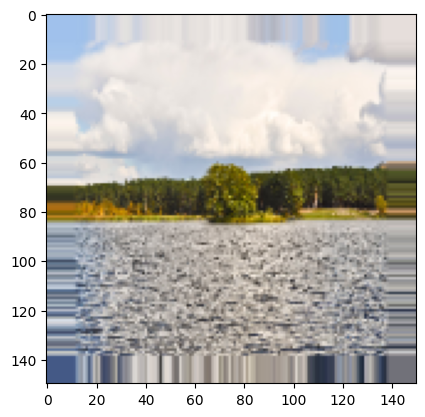

(20, 150, 150, 3)


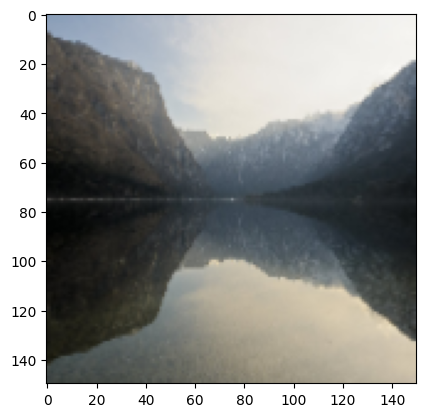

(20, 150, 150, 3)


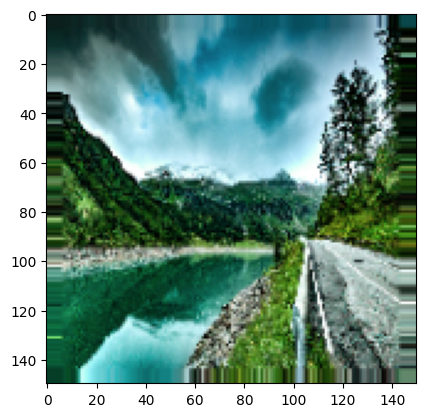

(20, 150, 150, 3)


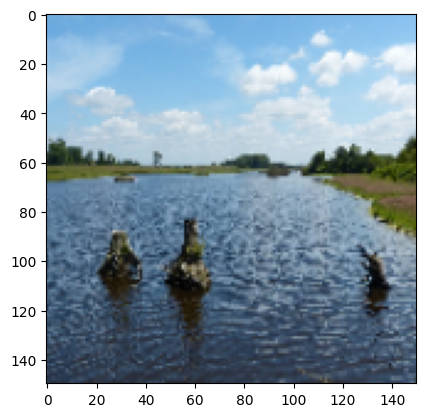

(10, 150, 150, 3)


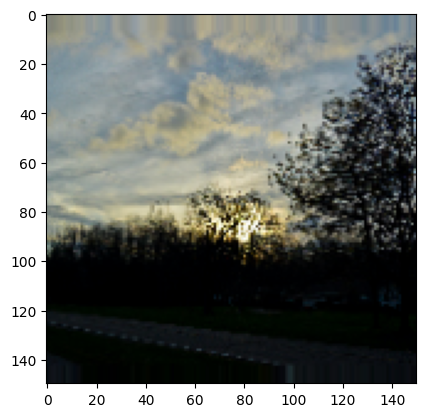

In [3]:
#Display the data set of xray models.
training = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


training_data = training.flow_from_directory(
        '/kaggle/input/river-vs-lake/River vs Lake',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=20,#Creates the batch size 
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels


def displayimages(numberofimages):
        for _ in range(numberofimages):
            img, label = training_data.next()
            print(img.shape)
            plt.imshow(img[0])
            plt.show()

            
displayimages(10)# Displays the first 100 training images.


**** Breaking up the data into test , train , validation ****


In [4]:
# Main directory containing the subdirectories for the two classes
main_directory = '/kaggle/input/river-vs-lake/River vs Lake'
target_size = (224, 224)

# Define the batch size (e.g., 32)
batch_size = 32

# Data augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.10  # Specify the validation split
)

# Create a data generator for both training and validation
train_generator = train_datagen.flow_from_directory(
    main_directory,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    main_directory,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use 'validation' subset for validation data
)

Found 172 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [23]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (you should adjust the number of epochs and other parameters as needed)
model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,  # Add the validation data
)model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,  # Add the validation data
)

Epoch 1/10
6/6 [==============================] - 94s 12s/step - loss: 1.1373 - accuracy: 0.5814 - val_loss: 41.8913 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 70s 13s/step - loss: 0.5030 - accuracy: 0.7849 - val_loss: 102.1569 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 70s 11s/step - loss: 0.4298 - accuracy: 0.8488 - val_loss: 12.7420 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 71s 11s/step - loss: 0.3949 - accuracy: 0.8547 - val_loss: 24.1163 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 72s 11s/step - loss: 0.3792 - accuracy: 0.8605 - val_loss: 9.7982 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 70s 13s/step - loss: 0.2276 - accuracy: 0.9070 - val_loss: 9.7855 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 72s 11s/step - loss: 0.2084 - accuracy: 0.9244 - val_loss: 8.4707 - val_accuracy: 0.5000
Epoch 8/10
6/6 [======

In [29]:
image_path = '/kaggle/input/river-vs-lake/River vs Lake/lake water/Image_10.jpg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img)

# You can interpret the prediction
if prediction > 0.5:
    print("It's a lake!")
else:
    print("It's a river!")


1/1 [==============================] - 0s 124ms/step
It's a lake!
